<a href="https://colab.research.google.com/github/Patotricks15/Data-Science-and-Statistics/blob/master/QUANDO_AS_TECNOLOGIAS_ENCONTRAM_AS_POL%C3%8DTICAS_P%C3%9ABLICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUANDO AS TECNOLOGIAS ENCONTRAM AS POLÍTICAS PÚBLICAS:** análise sobre a criminalidade em São Paulo a partir da plataforma *Onde fui roubado?*



![Imagem](https://i.imgur.com/6zjFCVg.jpg)
Mapa de concentração das ocorrências registradas pela plataforma


#INTRODUÇÃO

---
O objetivo desse trabalho é mostrar como as tecnologias são capazes de auxiliar os governos a entender como funcionam suas estruturas sociais, e ajudar a população a se previnir, tendo uma ideia de quão perigoso pode ser um determinado local. Utilizando a plataforma *Onde fui roubado?*, analisaremos a criminalidade em São Paulo (com dados até o início de 2018).

"Onde Fui Roubado é uma plataforma colaborativa para mapeamento de ocorrências de roubos, furtos e outros tipos de crimes em cidades do Brasil, disponível na versão web, para celulares com Android e iPhone (iOS). Com o serviço, é possível visualizar a incidência de crimes nas localidades e determinar as regiões mais perigosas. Os registros são feitos anonimamente e podem ser consultados por qualquer pessoa. O app permite filtrar informações por data e local." [[1]](https://www.techtudo.com.br/tudo-sobre/onde-fui-roubado.html)

**Os dados não são oficiais do governo, são disponibilizados pela plataforma. E suas limitações não nos permitiram fazer análises mais complexas e completas.**

São Paulo registra altos índices de violência, e é dever do Estado buscar reduzí-los, e a melhor maneira do Estado propor políticas públicas é se baseando em estatísticas. O Estado de São Paulo já possui sua própria base de dados sobre violência, sendo muito útil para pesquisas e elaboração de políticas públicas.[[2]](http://www.ssp.sp.gov.br/transparenciassp/Default.aspx)

Dito isso, o diferencial está na acessibilidade dos dados aos cidadãos. Pois mesmo que sejam de fácil acesso e visualização, as pessoas não têm o costume de olhá-los e analisá-los, tornando-os assim pouco úteis para fins diários. Quando os aplicativos e plataformas aparecem para auxiliar o governo, os dados podem chegar muito facilmente às mãos dos cidadãos, pois estes estão sempre conectados com o celular e/ou outros dispositivos móveis.


#EXTRAÇÃO, LIMPEZA E ORGANIZAÇÃO DOS DADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style();

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://www.dropbox.com/s/ghgb8xggbhgyuk3/dataset-limpo.csv?dl=1', parse_dates=['time'])

df.index = pd.to_datetime(df['time'], infer_datetime_format=True)

df.head(1)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,0,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,60.0,NaN,True,True,NaN,True,NaN,True,True,NaN,True,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-12-20 20:30:00 to 2012-03-02 09:44:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  12899 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          12899 non-null  object        
 3   descricao           12898 non-null  object        
 4   endereco            12899 non-null  object        
 5   id.1                12899 non-null  int64         
 6   ip_address_origin   11705 non-null  object        
 7   latitude            12899 non-null  float64       
 8   longitude           12899 non-null  float64       
 9   registrou_bo        12375 non-null  object        
 10  sexo                12899 non-null  int64         
 11  tipo_assalto_id     12899 non-null  int64         
 12  titulo              12899 non-null  object        
 13  uri        

In [4]:
def genero(i):
    if i == 1:
        return 'MASCULINO'
    else:
        return 'FEMININO'

df['sexo'] = df['sexo'].apply(lambda i: genero(i))


In [5]:
df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,sexo,titulo,uri,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
count,11196,12899,12898,12899,11705,12375,12899,12899,12899,256,3631,4243,2776,8377,112,94,1730,3660,239,324,552,45,764,5243,1350,106,443,178
unique,1577,12899,12898,11986,10432,2,2,10169,12899,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,São Paulo,2016-10-26 18:08:32.114,3 pessoas invadiram minha residência. Mais ced...,Carregando endereço,127.0.0.1,True,MASCULINO,Fui assaltado voltando do trabalho,/denuncias/eG4PQz-fui-assaltada-em-minha-casa,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,630,1,1,15,94,7340,7901,154,1,256,3631,4243,2776,8377,112,94,1730,3660,239,324,552,45,764,5243,1350,106,443,178


In [6]:
df_clean = df.copy()

bool_columns = ['Bicicleta', 'Bolsa ou Mochila', 'Carteira','Cartão de Crédito',
'Celular', 'Computador','DVD', 'Dinheiro' , 'Documentos','Equipamento de Som','Estepe', 'MP4 ou Ipod', 'Móveis',
'Notebook','Outros', 'Relógio', 'Som', 'Tablet', 'Tv', 'registrou_bo']

df_clean[bool_columns] = df_clean[bool_columns].fillna(False)
df_clean[bool_columns] = df_clean[bool_columns].astype(str)

df_clean.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,FEMININO,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,60.0,False,True,True,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,MASCULINO,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,NaN,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,MASCULINO,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,NaN,300.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,FEMININO,5,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,NaN,2500.0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,MASCULINO,1,Arrombaram meu carro que estava no estacioname...,/denuncias/zD1lJa-arrombaram-meu-carro-que-est...,NaN,9999.0,False,True,True,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,2012-01-11 08:15:00


In [7]:
#Verificar e excluir dados ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)
df_clean.dropna(subset=['bairro'], axis=0, inplace=True)
df.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-20 20:30:00,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,FEMININO,6,Entraram na minha casa e ficaram por 2h30,/denuncias/a71rZe-entraram-na-minha-casa-e-fic...,NaN,60.0,NaN,True,True,NaN,True,NaN,True,True,NaN,True,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00
2012-01-11 14:00:00,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,MASCULINO,1,Rádio do Carro Furtado,/denuncias/z6nRrz-radio-do-carro-furtado,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 14:00:00,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,MASCULINO,1,Rádio do carro furtado no estacionamento PAGO ...,/denuncias/V9lNKa-radio-do-carro-furtado-no-es...,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00
2012-01-11 18:20:00,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,FEMININO,5,Quebraram a janela do meu carro,/denuncias/a4NB1e-quebraram-a-janela-do-meu-carro,NaN,2500.0,NaN,True,True,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00
2012-01-11 08:15:00,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,MASCULINO,1,Arrombaram meu carro que estava no estacioname...,/denuncias/zD1lJa-arrombaram-meu-carro-que-est...,NaN,9999.0,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00


#ANÁLISE EXPLORATÓRIA

---

Depois de limpar os dados, iremos explorá-los. A fim de auxiliar governo e cidadãos, uma plataforma deve ser capaz de fornecer a maior quantidade de dados que puder, e são esses dados que iremos analisar.

Para que possamos nos guiar, a análise será dividida em:

*   **Quem** foi roubado?
*   **O que** foi roubado?
*   **Onde** foi roubado?
*   **Quando** foi roubado?

##QUEM FOI ROUBADO?

---
Começar a análise pela pergunta "quem?" nos dá uma base social sobre o problema estudado. É necessário entar ciente dos envolvidos nesse problema para que seja possível contorná-lo.


###Pessoas por gênero

####Estatística descritiva

In [8]:
sexo = df['sexo'].value_counts()
homens = sexo['MASCULINO']
mulheres = sexo['FEMININO']
masc_porc = sexo['MASCULINO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
femi_porc = sexo['FEMININO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100

Com os dados disponíveis, conseguimos fazer uma análise por gênero, vejam a seguir:

Homens: **7901 (61,25%)**

Mulheres: **4998 (38,75%)**

```
print('Homens: {} ({:.2f}%)'.format(homens,masc_porc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,femi_porc))
```



A análise fica melhor quando **mostramos** os dados:

####Visualização

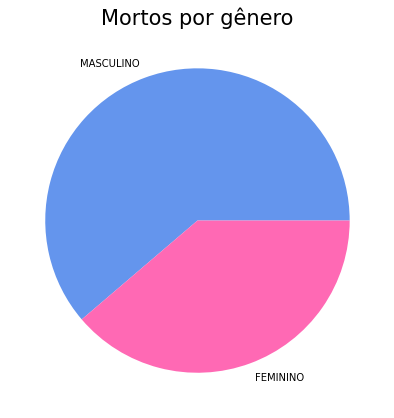

In [9]:
cor_genero = ['#6495ED','#FF69B4']
fig = plt.figure(figsize=(7,7))
sexo = df['sexo'].value_counts()
sexo_num = [sexo[0],sexo[1]]
plt.pie(sexo_num, labels=['MASCULINO','FEMININO'],colors=cor_genero)
plt.title('Mortos por gênero',fontsize=21);

###Pessoas que registraram boletim de ocorrência

####Estatística descritiva

####Visualização

In [10]:
bo = df['registrou_bo'].value_counts()
regist = bo[True]
naoregist = bo[False]
regist_porc = regist/(regist + naoregist)*100
naoregist_porc = naoregist/(regist + naoregist)*100

Podemos, também, classificar os usuários que registraram Boletim de Ocorrência e os que não registraram:

Registraram BO: 7340 **(59,31%)**

Não registraram BO: 5035 **(40,69%)**

```
print('Registraram BO: {} ({:.2f}%)'.format(regist,regist_porc))
print('Não registraram BO: {} ({:.2f}%)'.format(naoregist,naoregist_porc))



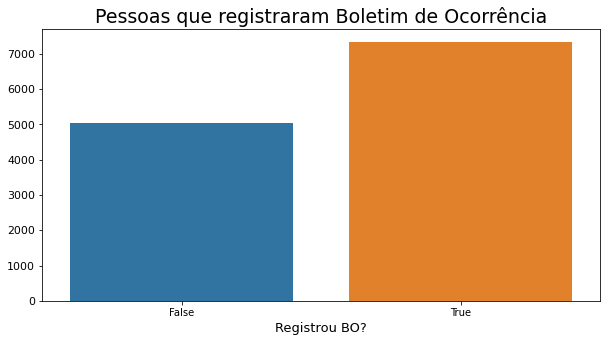

In [11]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='registrou_bo', data=df)
plt.xlabel('Registrou BO?',fontsize=13)
plt.ylabel('')
plt.yticks(fontsize=11)
plt.title('Pessoas que registraram Boletim de Ocorrência',fontsize=19);

Homens que registraram BO: **4487**


```
df[(df['sexo'] == 'MASCULINO')&(df['registrou_bo'] == True)].shape[0]
```


Homens que não registraram BO: **3087**


```
df[(df['sexo'] == 'MASCULINO')&(df['registrou_bo'] == False)].shape[0]
```


Mulheres que registraram BO: **2853**


```
df[(df['sexo']== 'FEMININO')&(df['registrou_bo'] == True)].shape[0]
```


Mulheres que registraram BO: **1943**


```
df[(df['sexo']== 'FEMININO')&(df['registrou_bo'] == False)].shape[0]
```



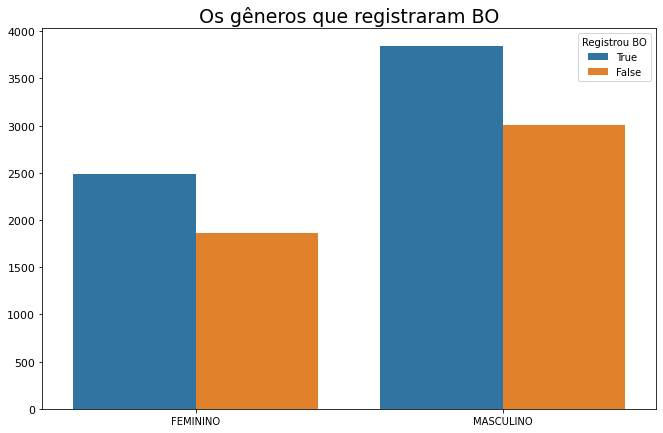

In [12]:
fig = plt.figure(figsize=(11,7))
sns.countplot(x='sexo',hue='registrou_bo',data=df_clean)
plt.xlabel('',fontsize=13)
plt.ylabel('')
plt.legend(title='Registrou BO')
plt.yticks(fontsize=11)
plt.title('Os gêneros que registraram BO',fontsize=19);

##O QUE FOI ROUBADO?

####Estatística descritiva

In [13]:
df['valor_prejuizo'].describe()

count      12899.000000
mean        2745.264592
std        11115.126241
min            0.000000
25%           25.000000
50%          700.000000
75%         2000.000000
max      1000000.000000
Name: valor_prejuizo, dtype: float64

In [14]:
df2 = df.describe(include='O')
df2_objetos = df.drop(columns=['bairro','id','created_at','descricao','endereco','id.1','ip_address_origin','latitude','longitude','registrou_bo','sexo','tipo_assalto_id','titulo','uri','user_id','valor_prejuizo','time'])
df2_objetos = df2_objetos.describe(include='O')
df2_objetos = df2_objetos.T
eixoy = df2_objetos.index
df2_objetos

,count,unique,top,freq
Bicicleta,256,1,True,256
Bolsa ou Mochila,3631,1,True,3631
Carteira,4243,1,True,4243
Cartão de Crédito,2776,1,True,2776
Celular,8377,1,True,8377
Computador,112,1,True,112
DVD,94,1,True,94
Dinheiro,1730,1,True,1730
Documentos,3660,1,True,3660
Equipamento de Som,239,1,True,239


In [15]:
obj_porc = df2_objetos['count'] / df2_objetos['count'].sum()*100
obj_porc

Bicicleta             0.750227
Bolsa ou Mochila       10.6409
Carteira               12.4344
Cartão de Crédito      8.13528
Celular                24.5494
Computador            0.328224
DVD                   0.275474
Dinheiro               5.06989
Documentos             10.7259
Equipamento de Som    0.700407
Estepe                0.949506
MP4 ou Ipod            1.61768
Móveis                0.131876
Notebook               2.23896
Outros                  15.365
Relógio                3.95628
Som                   0.310641
Tablet                 1.29824
Tv                    0.521642
Name: count, dtype: object

In [16]:
lista2 = []
lista2.append(df[(df['valor_prejuizo']== 0 ) & (df['sexo'] == 'MASCULINO')].shape[0])
for i in lista2:
  print(f'{i} homens tiveram R$0,00 reais de prejuizo')

1285 homens tiveram R$0,00 reais de prejuizo


In [17]:
lista2 = []
lista2.append(df[(df['valor_prejuizo']== 0 ) & (df['sexo'] == 'FEMININO')].shape[0])
for i in lista2:
  print(f'{i} mulheres tiveram R$0,00 reais de prejuizo')

922 mulheres tiveram R$0,00 reais de prejuizo


Podemos observar que:

*   A plataforma registrou **12899** casos de assalto nesse período de tempo

*   O maior prejuízo foi de **R$ 1 MILHÃO**

*   O valor **R$ 0,00** mostra que nem todos os crimes houveram prejuízos financeiros diretos

*   Foram registrados **1577** bairros diferentes


*   O item mais roubado foi o **celular** (**8377**)

*   O título mais comum para registro de crime foi "*Fui assaltado voltando do trabalho*", o que diz muito sobre a situação da segurança pública na cidade.

####Visualização

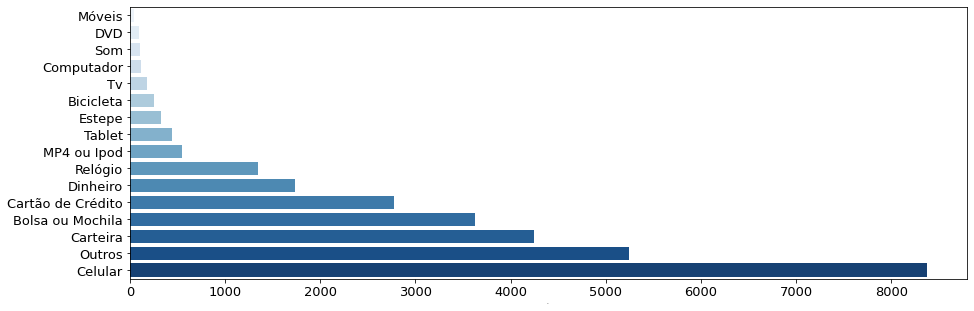

In [18]:
paleta1 = sns.color_palette("Blues",16)
fig = plt.figure(figsize=(15,5))
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('',fontsize=0)
sns.barplot(x = 'freq', y = df2_objetos.index, order = ['Móveis','DVD','Som','Computador','Tv','Bicicleta','Estepe','Tablet','MP4 ou Ipod','Relógio','Dinheiro','Cartão de Crédito','Bolsa ou Mochila','Carteira','Outros','Celular'], palette=paleta1,data = df2_objetos);

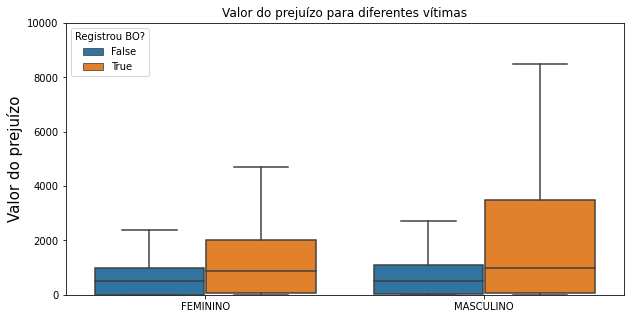

In [19]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='sexo',y='valor_prejuizo',showfliers=False,hue='registrou_bo',data=df)
plt.ylim(0,10000)
plt.title('Valor do prejuízo para diferentes vítimas')
plt.legend(title='Registrou BO?')
plt.ylabel('Valor do prejuízo',fontsize=15)
plt.xlabel('');

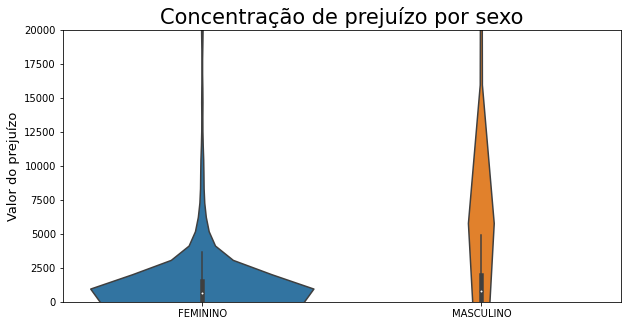

In [20]:
fig = plt.figure(figsize=(10,5))
sns.violinplot(x='sexo',y='valor_prejuizo',data=df)
plt.ylim(0,20000)
plt.title('Concentração de prejuízo por sexo',fontsize=21)
plt.ylabel('Valor do prejuízo',fontsize=13)
plt.xlabel('');

No grpafico acima podemos ver que o prejuizo do gênero feminino é mais concentrado na faixa 0 ~ 2500, enquanto que o do gênero masculino é mais "espalhado" (uniforme) ao longo dos valores de prejuízo.

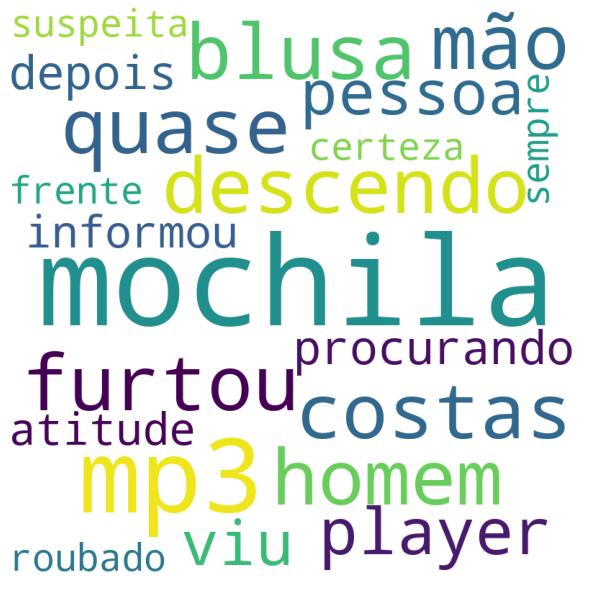

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = ['estava','para','largo','minha','uma','batata','teria','dica','cima','eu','que','meu','em','fica','um','o','os','as','a','ele','ela','da','do','nas','não','nos'] + list(STOPWORDS)

for valor in df.descricao: 

   valor = str(valor) 

   tokens = valor.split() 

for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Como podemos observar, palavras como "mochila", "homem", "mp3", "furto" são muito comuns, podendo traçar um perfil de descrição sobre o assaltante. Isso é importante para que as forças do Estado possam agir de forma menos irracional.
O que essas plataformas e aplicativos deveriam fornecer, é um sistema de descrição que informe da melhor maneira possível, e os usuários deixando claro o que ocorreu.

##ONDE FOI ROUBADO?

---
A localização é essencial ao analisar um aspecto social, pois a base da sociedade é estar imersa num território, o que nos torna intrinsicamente ligado ao local em que estamos. Logo abaixo do título, deixei um mapa que representa as ocorrências obtidas pela plataforma.


###Estatística descritiva

In [22]:
bairro_porc = df['bairro'].value_counts().max() / df['bairro'].value_counts().sum()*100
bairro_porc

5.627009646302251

O bairro que mais registrou ocorrências: São Paulo (**630**)
```
df['bairro'].value_counts().max()
```
O bairro que menos registrou ocorrências:  Vila Picinin (**01**)
```
df['bairro'].value_counts().min()
```

O fato de existir baixas ocorrências registradas não refletem **necessariamente** baixo índice de criminalidade, mas pode representar falta de acesso à internet e meios de comunicação.
E existem outros bairros que registraram menos ocorrências, mas a ordem alfabética fez com que Vila Picinin ficasse por último.

###Visualização

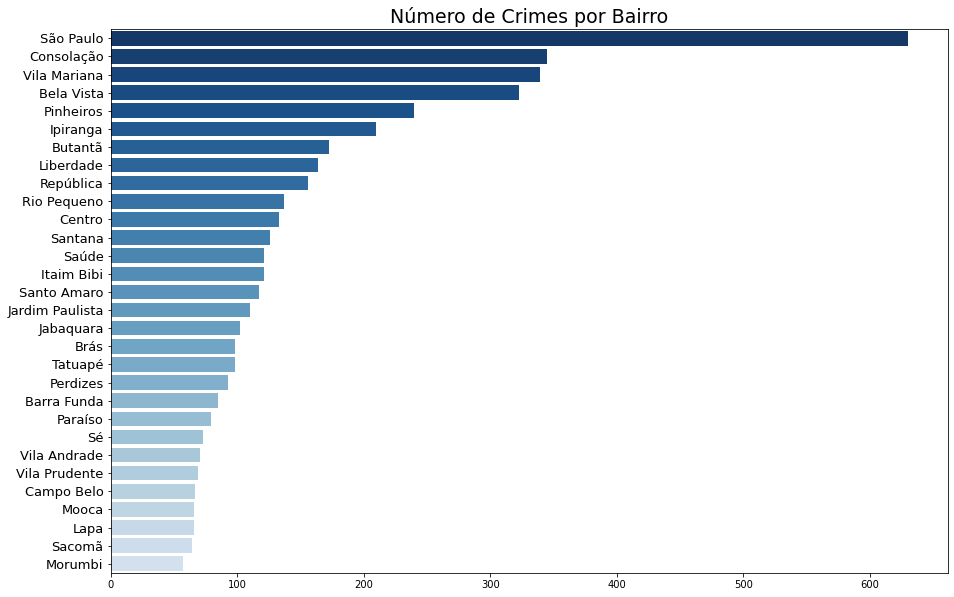

In [23]:
# coletando e ordenando os valores para cada bairro
paleta2 = sns.color_palette("Blues_r",37)
bairros = df_clean.bairro.value_counts().sort_values(ascending=False).iloc[0:30]
fig = plt.figure(figsize=(15,10))
sns.barplot(bairros.values, bairros.index,palette=paleta2,data=df);

plt.ylabel('')
plt.xlabel('')
plt.yticks(fontsize=13)
plt.title('Número de Crimes por Bairro',fontsize=19);

##QUANDO FOI ROUBADO?

---
A última análise é em relação ao tempo. Veremos os **anos, meses e dias do mês** em que a plataforma mais registrou mais casos de assalto.


In [24]:
df_clean.index.year.value_counts()

2014    4079
2013    2179
2016    1857
2017    1569
2015     929
2012     368
2018     196
2010      11
2011       8
Name: time, dtype: int64

In [25]:
df_clean.index.month.value_counts()

8     1290
10    1151
6     1107
7     1034
11    1020
9     1013
1      839
5      817
3      798
2      787
4      702
12     638
Name: time, dtype: int64

In [26]:
df_clean.index.day.value_counts()

11    463
15    446
10    443
20    442
14    412
8     405
1     403
16    395
13    384
7     380
12    378
25    372
4     362
18    361
6     361
22    358
5     354
17    353
9     352
23    351
3     348
26    346
19    342
24    336
2     328
21    326
27    319
28    313
30    303
29    274
31    186
Name: time, dtype: int64

In [27]:
df_clean.index.weekday.value_counts()

4    1819
2    1797
3    1776
1    1658
5    1491
0    1420
6    1235
Name: time, dtype: int64

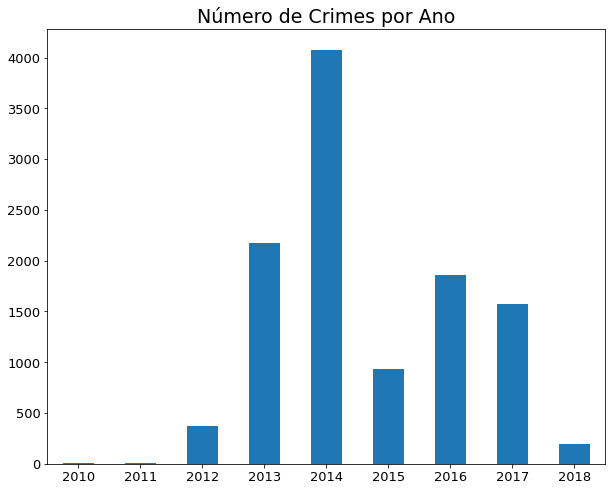

In [28]:
# criando a visualização
fig = plt.figure(figsize=(10,8))
df_clean.groupby([df_clean.index.year]).size().plot(kind='bar')
# definindo o título da visualização
plt.title('Número de Crimes por Ano',fontsize=19)
plt.xlabel('')
plt.yticks(fontsize=13)
plt.xticks(fontsize=13,rotation=360);

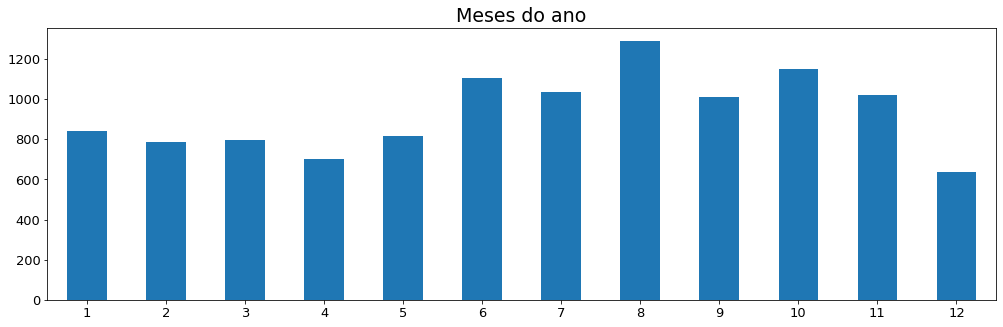

In [29]:
fig = plt.figure(figsize=(17,5))
df_clean.groupby([df_clean.index.month]).size().plot(kind='bar')
plt.title('Meses do ano',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

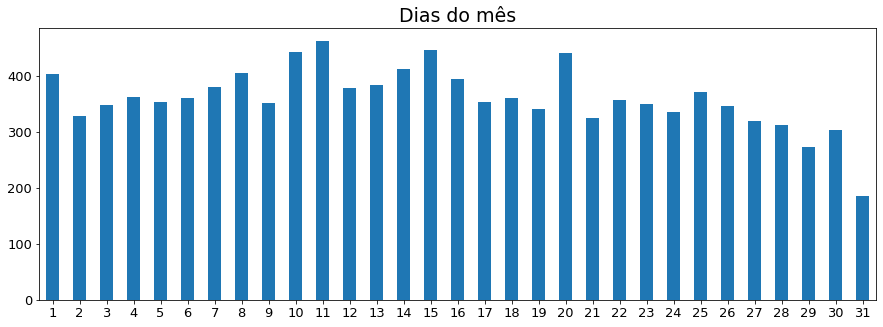

In [30]:
fig = plt.figure(figsize=(15,5))
df_clean.groupby([df_clean.index.day]).size().plot.bar()
plt.title('Dias do mês',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

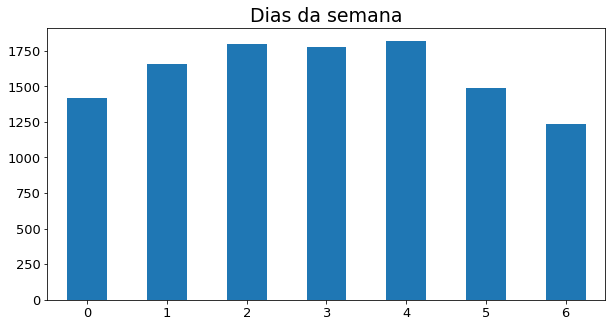

In [31]:
fig = plt.figure(figsize=(10,5))
df_clean.groupby([df_clean.index.weekday]).size().plot.bar()
plt.title('Dias da semana',fontsize=19)
plt.xticks(fontsize=13,rotation=360)
plt.xlabel('')
plt.yticks(fontsize=13);

#CONCLUSÕES

##Conclusão dos dados

Temos, então, algumas conclusões a partir dos dados disponibilizados pela plataforma:

*   Os **homens** são as maiores vítimas dos crimes (**61,25%**);

*   O item mais roubado foi o **celular** (**24,54%**);

*   O maior prejuízo foi de **R$1.000.000** (UM MILHÃO);

*   A maioria das pessoas registraram BO (**59,31%**);

*   O bairro com mais ocorrência de crimes foi **São Paulo** (**5,62%**);

*   O **ano** em que mais foram registradas ocorrências: **2014**;

*   O **mês** em que mais foram registradas ocorrências: **Agosto**

*   O **dia do mês** em que mais foram registradas ocorrências: **10 a 15**

*   O **dia da semana** em que mais foram registradas ocorrências: **Quinta-feira**


##Conclusão final

---

Sabemos que dados são importantes para a tomada de decisões, o que nos falta é ter fácil acesso a esses dados. E é isso que a plataforma aqui analisada se propõe a fazer.

Vemos hoje muitas pessoas com tecnologias nas mãos, com tudo à um clique de distância, tendo o celular como extensão do próprio corpo. Não há nem a necessidade de consultar, pois as notificações baseadas na localização (GPS) do aparelho podem fazer todo o trabalho.

Em tempos de conexão, o governo deve se atualizar constantemente e informar suas instituições e seus cidadãos. O governo precisa estar apto às mudanças sociais provocadas pelas inovações tecnológicas, e se aproveitar dessas inovações para facilitar o convívio em sociedade. O tema aqui tratado foi sobre violência urbana, mas as inovações estão chegando em diversas áreas (**comunicação, emprego, saneamento, cultura, lazer, mobilidade urbana, etc**.) e isso deve ser aproveitado com o objetivo último de tornar as políticas públicas mais eficientes e levá-las até os locais de mais difícil acesso.

"As tecnologias sociais são produtos, técnicas ou metodologias reaplicáveis, desenvolvidas em interação com a comunidade, e que representem efetivas soluções de transformação social. São experiências inovadoras que contribuem para resolver grandes problemas sociais." [[3]](http://www.mobilizadores.org.br/entrevistas/tecnologias-sociais-possibilitam-modelos-alternativos-de-desenvolvimento/)

A sociedade pode levar vantagem disso se houverem parcerias que se dediquem à informar os cidadãos sobre o que está acontecendo em seu território e no seio da própria sociedade. Informar sobre a violência é algo crucial para quem deseja reduzir esses números, e ser informado é importante para quem deseja evitar ser assaltado. Então é de interesse do cidadão ser informado, e deve ser obrigação do governo e de suas instituições, informar.

“*Inovação não é feita apenas usando tecnologia. A tecnologia pode ser um meio, mas ver e transformar um jeito de fazer algo, mudar a forma como encaramos desafios, tudo isso pode ser visto e feito de forma inovadora.*” - Gustavo Maia

#REFERÊNCIAS

---
[1] http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

[2] https://www.techtudo.com.br/tudo-sobre/onde-fui-roubado.html

[3] http://www.mobilizadores.org.br/entrevistas/tecnologias-sociais-possibilitam-modelos-alternativos-de-desenvolvimento/

## Leituras complementares:

https://www.colab.re/conteudo/tecnologia-um-meio-para-governos-inovarem

https://www.digix.com.br/tecnologia-no-setor-publico-quais-sao-os-desafios-e-necessidades/

https://www.e-gestaopublica.com.br/inovacao-e-governo/